<a href="https://colab.research.google.com/github/pantso251/DSFSE_Portfolio/blob/main/preparation_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necesary libraries
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('mean-rate-per-beach.csv', sep = ";",  encoding = "latin1")
df.head()
df.info()
df.describe()
print(df.head())

In [ ]:
# Reading file containing coords
coords_df = pd.read_csv("beaches-name-coords.csv", sep = ";" )
coords_df.head()

# Setting the X and Y values to str and replacing "," with "."
coords_df["X"] = coords_df["X"].astype(str).str.replace( ",", "." )
coords_df["Y"] = coords_df["Y"].astype(str).str.replace( ",", "." )

# Convert str coords to numerical values (floats) for true number displaying
coords_df["X"] = pd.to_numeric(coords_df["X"])
coords_df["Y"] = pd.to_numeric(coords_df["Y"])
coords_df.head()

,Beach code,Beach,X,Y,Orientation (Codice),Orientation,Region,Country
0,40,Aciddara,13.537345,38.080366,SE,Sud-Est,NaN,Italia
1,149,Bagni della Regina Giovanna - Sorrento (Na),14.351224,40.633559,NW,Nord-Ovest,NaN,Italia
2,59,baia delle favole,9.391254,44.270728,W,Ovest,NaN,Italia
3,123,Boschetto Steccato di Cutro,16.931957,38.934628,NaN,NaN,NaN,Italia
4,105,Cala Santa Maria,13.195334,38.708912,NaN,NaN,NaN,Italia


In [ ]:

coords_df = coords_df.rename(columns = {"X": "lon"})
coords_df = coords_df.rename(columns = {"Y" : "lat"})
coords_df.head()
coords_df.tail(3)

,Beach code,Beach,lon,lat,Orientation (Codice),Orientation,Region,Country
119,30,trabucco,10.135116,43.982569,N,Nord,NaN,Italia
120,87,Vergine Maria,13.368520,38.166260,NE,Nord-Est,NaN,Italia
121,141,Wild beach,15.894314,41.580525,E,Est,NaN,Italia


In [ ]:
# new_coords_df = pd.read_csv("beaches_corrected.csv")

# # Convert API coords and rescale to real lat/lon
# new_coords_df["API_lat"] = pd.to_numeric(new_coords_df["API_lat"], errors="coerce") / 1e8
# new_coords_df["API_lng"] = pd.to_numeric(new_coords_df["API_lng"], errors="coerce") / 1e8
# new_coords_df.head()

# new_coords_df["API_lat"] = new_coords_df["API_lat"].dropna(subset=["API_lat","API_lng"]
#                                                    )
# new_coords_df["API_lng"] = new_coords[(coords["API_lat"].between(6, 20))]
# new_coords_df["Original_Beach_Name", "API_lat", "API_lng"].head()
# # # scale coords to real degrees
# # new_coords_df["API_lat"] = new_coords_df["API_lat"] / 1e8
# # new_coords_df["API_lng"] = new_coords_df["API_lng"] / 1e8
# # new_coords_df.head()

# #new_coords_df[["API_lat", "API_lng"]].head()

# # # stop showing sceintific notations
# # pd.options.display.float_format = '{:.2f}'.format
# # new_coords_df[["API_lat", "API_lng"]].head()


TypeError: Series.dropna() got an unexpected keyword argument 'subset'

In [ ]:
# Read the file
new_coords_df = pd.read_csv("beaches_corrected.csv")

# Convert SEARCH columns to numeric and scale
new_coords_df["lat"] = pd.to_numeric(new_coords_df["Search_lat"], errors="coerce") / 1e8 # removing excess numbering (volume) for lng
new_coords_df["lon"] = pd.to_numeric(new_coords_df["Search_lng"], errors="coerce") / 1e8 # removing excess numbering (volume) for lat

# Remove rows with missing coords
new_coords_df = new_coords_df.dropna(subset=["lat", "lon"])

# Show result
new_coords_df[["Original_Beach_Name", "lat", "lon"]].head()
new_coords_df.head()

# new_coords_df["rating"]/ 10 # trying to resolve ratings values dividing by 10
# this doesnt work, cerate a conditional logic

# new_coords_df["rating"] = pd.to_numeric(new_coords_df["rating"], errors="coerce")
#if new_coords_df["rating"] > 10:
    #new_coords_df["rating"] = new_coords_df["rating"] / 10

#
new_coords_df["rating"] = new_coords_df["rating"].apply(lambda x: x / 10 if x > 10 else x) # yeah AI did this

# new_coords_df.head()
# new_coords_df.tail()
new_coords_df
new_coords_df.drop(columns=["Match_Type", "API_lat", "API_lng", "types", "vicinity"], inplace=True)
new_coords_df.head()

new_coords_df.to_csv("beaches_corrected_final.csv", index=False)


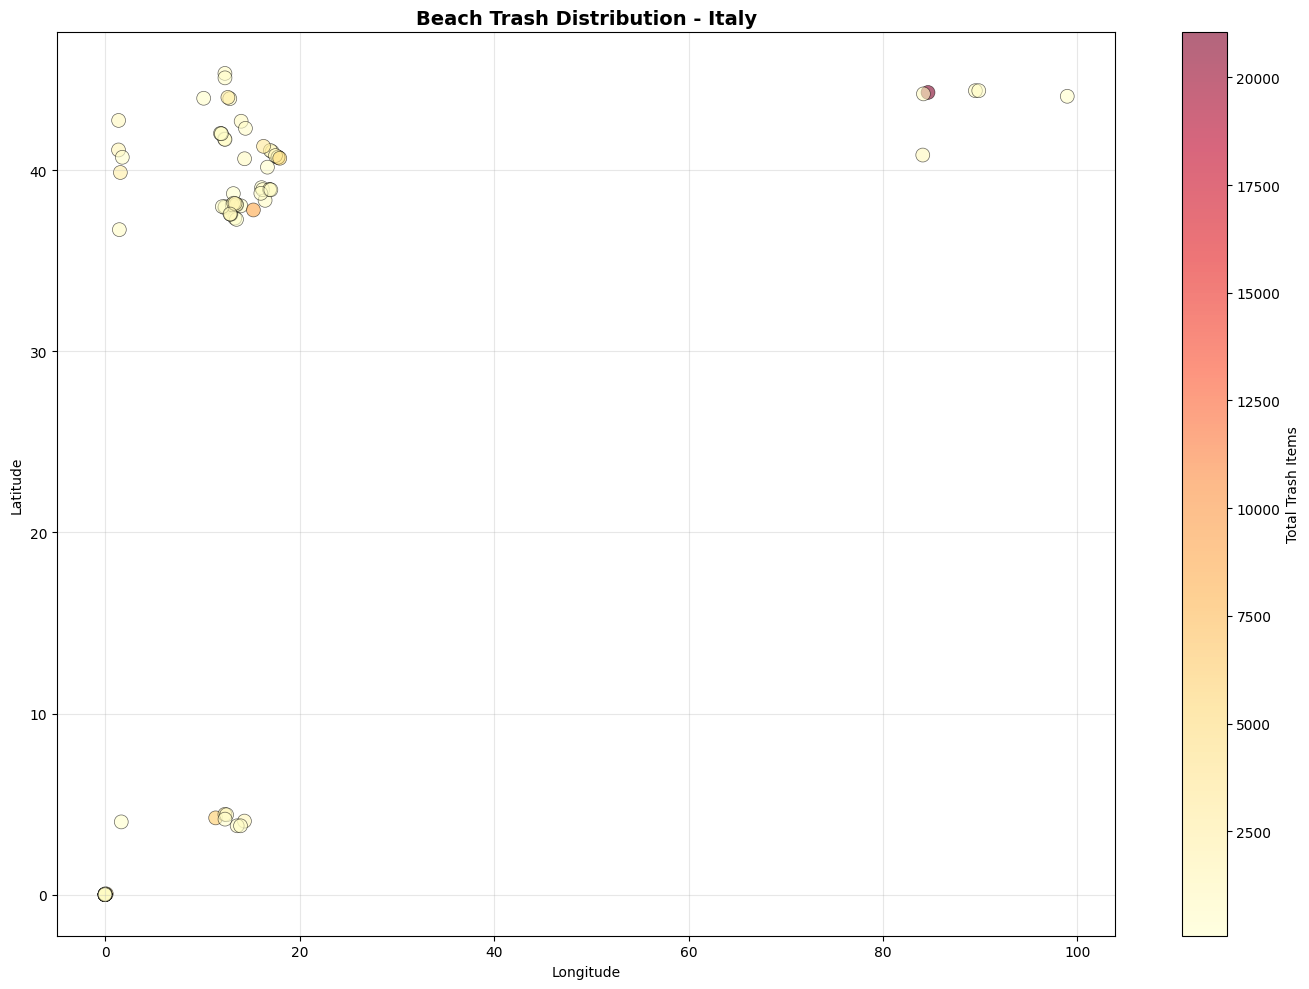

In [ ]:
# simple heatmap production
import pandas as pd
import matplotlib.pyplot as plt

# Load your merged data
df = pd.read_csv("merged_dataset_v2.csv")

# Aggregate to one row per beach
beach_agg = df.groupby(['Original_Beach_Name', 'lat', 'lon'], as_index=False).agg({
    'Trash amount': 'sum',
    'rating': 'mean'
})

# Create figure
plt.figure(figsize=(14, 10))

# Scatter plot with color representing trash density
scatter = plt.scatter(
    beach_agg['lon'],
    beach_agg['lat'],
    c=beach_agg['Trash amount'],  # color by trash amount
    s=100,  # point size
    cmap='YlOrRd',  # yellow-orange-red colormap
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

# Add colorbar
plt.colorbar(scatter, label='Total Trash Items')

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Beach Trash Distribution - Italy', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Save
plt.tight_layout()
plt.savefig('beach_trash_basic_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Interactive heat map web based
import pandas as pd
import folium
from folium.plugins import HeatMap

